### <font color=black> IMPORT:: <font color=blue> **py modules** </font> </font>

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
from mpl_toolkits.basemap import Basemap
import glob
import os
import shutil
import re
import cartopy
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
%matplotlib inline
#
PD=os.getcwd(); PD


'/scratch/pk695/FACTS/002_fork/facts/JupNbk/000_pk-JupNb_TESTspace/2023-01_NZ_INSAR'

In [6]:
path1='/scratch/pk695/FACTS/NZrerun-pk695/GREGS_data2NZ/low_confidence/ssp126/AIS_ssp126_low_confidence_rates.nc'
path2='/scratch/pk695/FACTS/NZrerun-pk695/local-pk695/006_confidence_output_files/low_confidence/ssp126/AIS_ssp126_low_confidence_rates.nc'

In [20]:

d_nc1=xr.open_dataset(path1);  
d_nc2=xr.open_dataset(path2)


In [30]:
d_nc1

<xarray.Dataset>
Dimensions:                (locations: 7435, years: 29, quantiles: 107)
Coordinates:
  * locations              (locations) int32 0 1 2 3 4 ... 7431 7432 7433 7434
  * years                  (years) int32 2020 2030 2040 2050 ... 2280 2290 2300
  * quantiles              (quantiles) float64 0.0 0.001 0.005 ... 0.999 1.0
Data variables:
    lat                    (locations) float32 ...
    lon                    (locations) float32 ...
    sea_level_change_rate  (quantiles, years, locations) float32 ...
Attributes:
    description:  Combined confidence output file for AR6 sea-level change pr...
    history:      Created Tue Sep 28 17:06:56 2021
    source:       Files Combined: /projects/kopp/ggg46/nz_projections/regiona...

In [31]:
d_nc2

<xarray.Dataset>
Dimensions:                (locations: 8179, years: 14, quantiles: 107)
Coordinates:
  * locations              (locations) int32 -1294967296 ... -1294885516
  * years                  (years) int32 2020 2030 2040 2050 ... 2130 2140 2150
  * quantiles              (quantiles) float64 0.0 0.001 0.005 ... 0.999 1.0
Data variables:
    lat                    (locations) float32 ...
    lon                    (locations) float32 ...
    sea_level_change_rate  (quantiles, years, locations) float32 ...
Attributes:
    description:  Combined confidence output file for AR6 sea-level change pr...
    history:      Created Thu Mar 23 11:34:54 2023
    source:       Files Combined: /scratch/pk695/FACTS/NZrerun-pk695/local-pk...

In [ ]:
# Extract the variable to add.
slr = d_nc1['sea_level_change_rate'][:,:,1] - d_nc2['sea_level_change_rate'][:,:,1]

In [29]:
slr

<xarray.DataArray 'sea_level_change_rate' (quantiles: 107, years: 14)>
array([[-0.6999998 , -1.        , -1.8000002 , ..., -0.29999924,
        -0.20000076, -0.39999962],
       [ 0.20000005, -0.0999999 ,  0.        , ..., -0.40000057,
        -1.5       , -2.9000006 ],
       [ 0.        ,  0.10000014,  0.20000005, ..., -0.6999998 ,
        -0.8000002 , -0.6999998 ],
       ...,
       [ 0.8000002 ,  0.70000076,  0.6999998 , ..., -0.10000038,
         0.        , -0.19999886],
       [ 0.5999994 ,  0.6999998 ,  0.5999994 , ...,  0.10000038,
        -0.80000114, -0.5999985 ],
       [ 0.8000002 ,  0.8000002 ,  2.000001  , ...,  3.        ,
         3.2000027 ,  4.699999  ]], dtype=float32)
Coordinates:
  * years      (years) int32 2020 2030 2040 2050 2060 ... 2120 2130 2140 2150
  * quantiles  (quantiles) float64 0.0 0.001 0.005 0.01 ... 0.99 0.995 0.999 1.0

In [27]:
slr.shape

(107, 14)

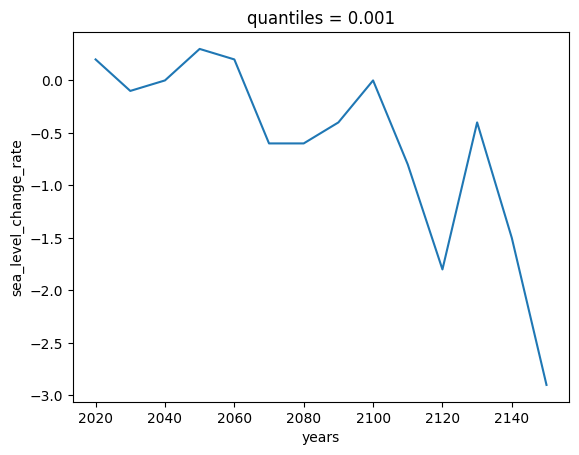

In [28]:
slr[1,:].plot()

In [19]:
d_nc1['sea_level_change_rate'][:,:,1]

<xarray.DataArray 'sea_level_change_rate' (quantiles: 107, years: 29)>
[3103 values with dtype=float32]
Coordinates:
    locations  int32 1
  * years      (years) int32 2020 2030 2040 2050 2060 ... 2270 2280 2290 2300
  * quantiles  (quantiles) float64 0.0 0.001 0.005 0.01 ... 0.99 0.995 0.999 1.0
Attributes:
    units:    mm per year

In [11]:
d_nc1

<xarray.Dataset>
Dimensions:                (locations: 7435, years: 29, quantiles: 107)
Coordinates:
  * locations              (locations) int32 0 1 2 3 4 ... 7431 7432 7433 7434
  * years                  (years) int32 2020 2030 2040 2050 ... 2280 2290 2300
  * quantiles              (quantiles) float64 0.0 0.001 0.005 ... 0.999 1.0
Data variables:
    lat                    (locations) float32 ...
    lon                    (locations) float32 ...
    sea_level_change_rate  (quantiles, years, locations) float32 ...
Attributes:
    description:  Combined confidence output file for AR6 sea-level change pr...
    history:      Created Tue Sep 28 17:06:56 2021
    source:       Files Combined: /projects/kopp/ggg46/nz_projections/regiona...